<a href="https://colab.research.google.com/github/Shubhamjaiswal54/Hands-on-ml/blob/main/chapter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp  /content/drive/MyDrive/KAGGLE_CRED/kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download mohamedafsal007/house-price-dataset-of-india

Dataset URL: https://www.kaggle.com/datasets/mohamedafsal007/house-price-dataset-of-india
License(s): other
house-price-dataset-of-india.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip house-price-dataset-of-india.zip

Archive:  house-price-dataset-of-india.zip
replace House Price India.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: House Price India.csv   


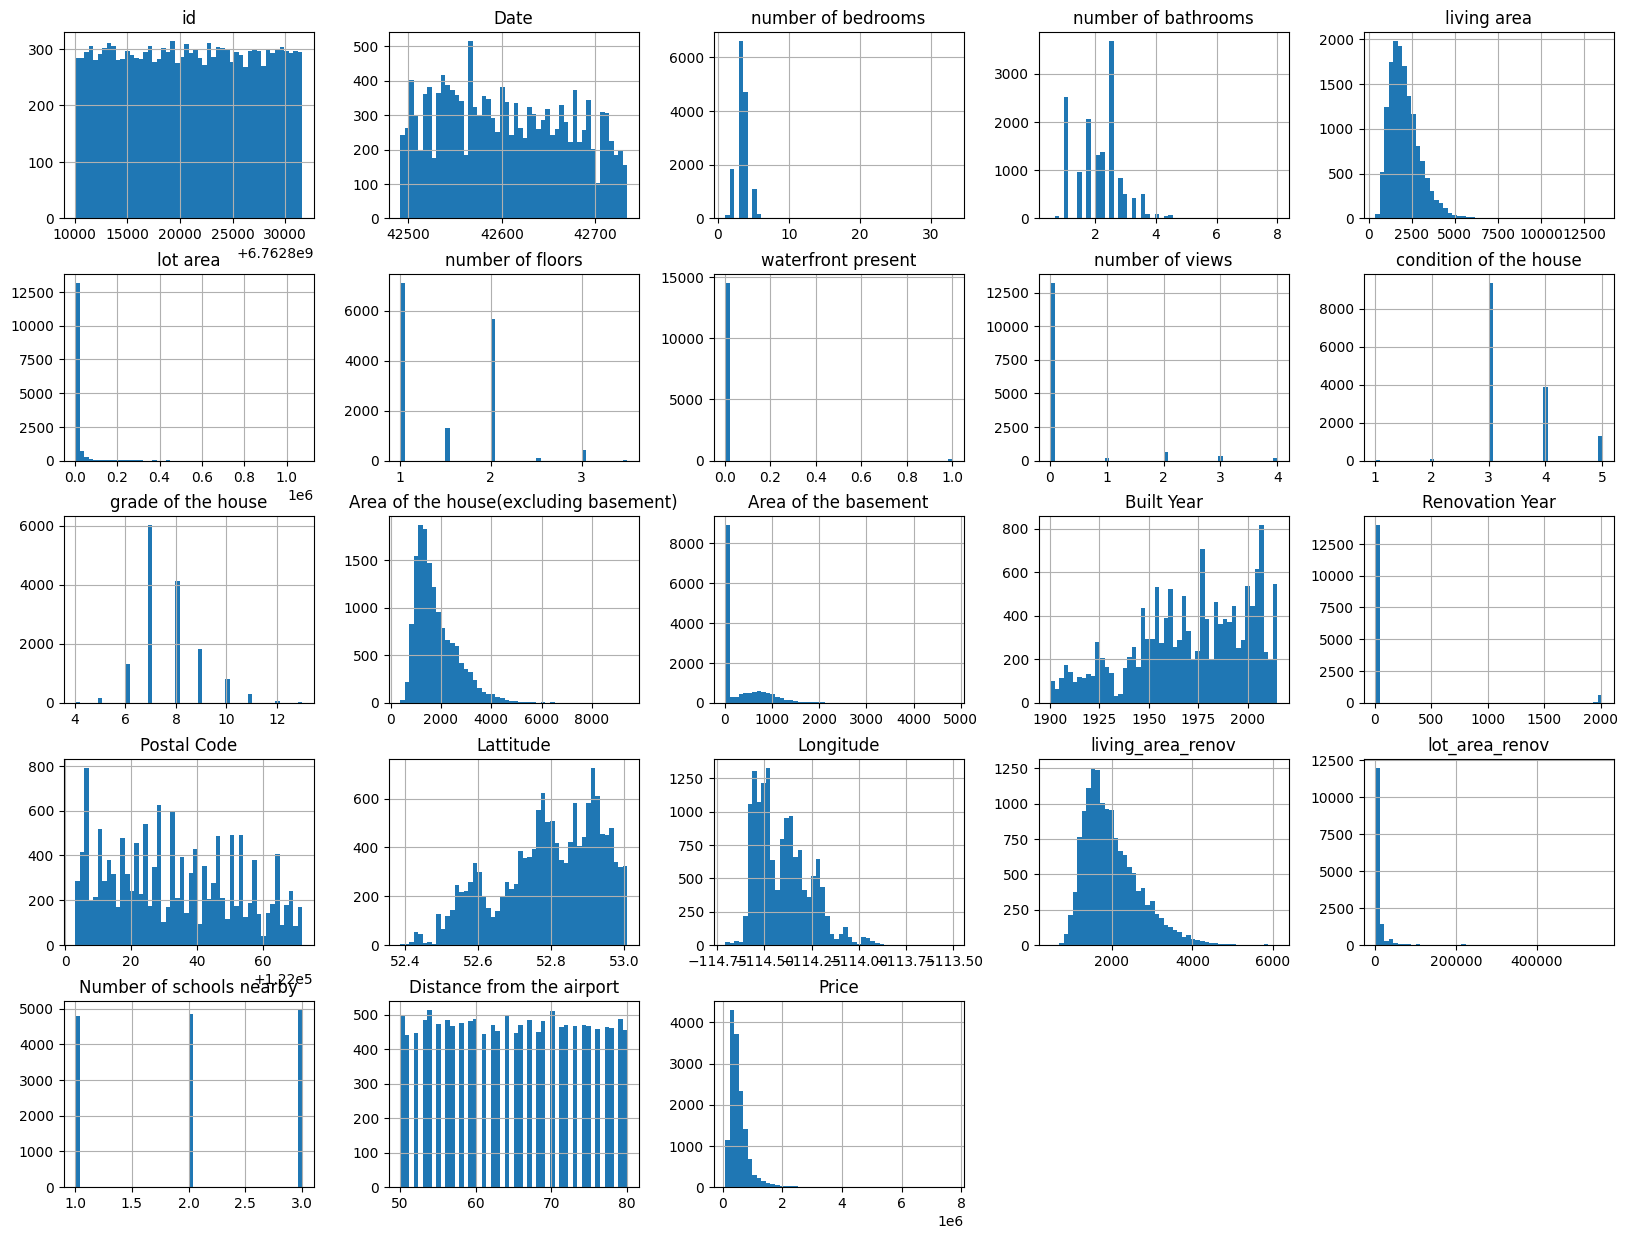

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def load_dataset():
  return pd.read_csv("/content/House Price India.csv")

housing = load_dataset()
# housing.info()
# housing.head()
# housing.describe()
housing.hist(bins= 50, figsize=(20,15))
plt.show()

import numpy as np
from zlib import crc32
def split_train_set(data, test_ratio):
  shuffled_indices = np.random.permutation(len(data))
  test_set_indices = int(len(data) * test_ratio)
  test_indices = shuffled_indices[:test_set_indices]
  train_indices = shuffled_indices[test_set_indices:]

  return data.iloc[train_indices] , data.iloc[test_indices]

def test_set_check(identifier , test_ratio):
  return crc32(np.int64(identif))


In [ ]:
import numpy as np
from zlib import crc32
def split_train_set(data, test_ratio):
  shuffled_indices = np.random.permutation(len(data))
  test_set_indices = int(len(data) * test_ratio)
  test_indices = shuffled_indices[:test_set_indices]
  train_indices = shuffled_indices[test_set_indices:]
  return data.iloc[train_indices] , data.iloc[test_indices]

def test_set_check(identifier , test_ratio):
   return crc32(np.int64(identifier)) &  0xffffffff < test_ratio * 2**32

def train_set_by_id(data, test_ratio , id_column):
  ids =  data[id_column]
  in_test_set = ids.apply(lambda id_ : test_set_check(id_ ,test_ratio))
  return data.loc[~in_test_set] , data.loc[in_test_set]

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
housing = train_set.drop("Price", axis=1)
housing_labels = train_set["Price"].copy()

<Axes: xlabel='Longitude', ylabel='Lattitude'>

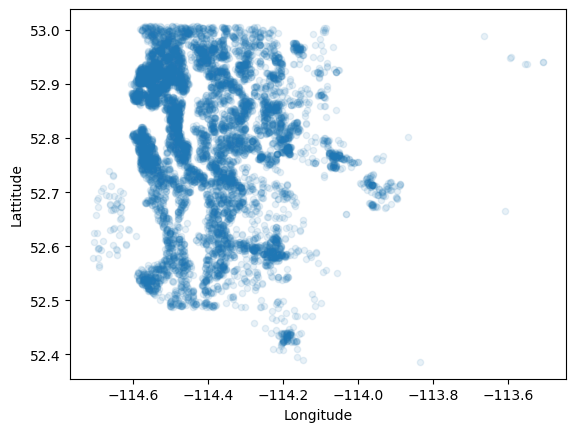

In [ ]:
housing.plot(kind  = 'scatter' , y = "Lattitude" , x = "Longitude" , alpha=0.1)

In [ ]:
corr_matrix = housing.corr()
corr_matrix["Price"].sort_values(ascending = False)

,Price
Price,1.000000
living area,0.712169
grade of the house,0.671814
Area of the house(excluding basement),0.615220
living_area_renov,0.584924
number of bathrooms,0.531735
number of views,0.395973
Area of the basement,0.330202
number of bedrooms,0.308460
Lattitude,0.297490


In [ ]:
housing_data = housing.drop("Price", axis=1)
housing_labels = housing["Price"].copy()

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
 def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
   self.add_bedrooms_per_room = add_bedrooms_per_room
 def fit(self, X, y=None):
  return self  # nothing else to do
 def transform(self, X):
  rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
  population_per_household = X[:, population_ix] / X[:, households_ix]
  if self.add_bedrooms_per_room:
    bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
    return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
  else:
    return np.c_[X, rooms_per_household, population_per_household]

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
num_pipeline = Pipeline([
 ('imputer', SimpleImputer(strategy="median")),
 ('std_scaler', StandardScaler()),
 ])
housing_num_tr = num_pipeline.fit_transform(housing)

In [ ]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing)
full_pipeline = ColumnTransformer([
 ("num", num_pipeline, num_attribs),
 ])
housing_prepared = full_pipeline.fit_transform(housing)

In [ ]:
# from sklearn.linear_model import LinearRegression

# lin_reg = LinearRegression()
# lin_reg.fit(housing_prepared, housing_labels)

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [ ]:
some_data = housing.iloc[:5]
some_label = housing_labels[:5]
some_data_prep = full_pipeline.transform(some_data)
print("predictions" ,tree_reg.predict(some_data))
print("lables" , list(some_label))

predictions [80000. 80000. 80000. 80000. 80000.]
lables [1350000, 585000, 500000, 784950, 735000]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import mean_squared_error

housing_predictions = tree_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

0.0


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
  print("scores" , scores)
  print("Mean" , scores.mean())
  print("std dev" ,scores.std())

display_scores(tree_rmse_scores)

scores [ 3980.51610881  2080.76819004 82274.12855888 36098.58795787
 13379.27812409  6971.61732683  6239.27796599  8938.9629156
  9087.79115901 43266.53587638]
Mean 21231.746418350755
std dev 24259.98161872095


In [ ]:
! pwd


/content
